In [1]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/vijaybez/new-start/titanic-csv/datasets/titanic.csv')

In [2]:
#treat the data for mising null values. In this case, we cannot fill in missing values as they are categorical values without any parameters influencing them..
#so remmoving records without Age and Embarked data
titanic_age=titanic[pd.notnull(titanic['Age'])]
titatinc_age_emabark =titanic_age[pd.notnull(titanic['Embarked'])]

#Create a dataframe with group by Gender
gender_data = titatinc_age_emabark.groupby('Sex')
gender_mean_data=gender_data.mean()
print(gender_mean_data[['Survived','Pclass','Age','SibSp','Parch','Fare']])

#a value to sum up for every passenger. Could be done using count passenger ID as well
titatinc_age_emabark['count_pass']=1
gender_df = titatinc_age_emabark.groupby('Sex',as_index=False).agg({'Survived':sum,'count_pass':sum})

        Survived    Pclass        Age     SibSp     Parch       Fare
Sex                                                                 
female  0.752896  2.073359  27.745174  0.644788  0.714286  47.332433
male    0.205298  2.335541  30.726645  0.439294  0.271523  27.268836


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [3]:
gender_df.head()

,Sex,Survived,count_pass
0,female,195,259
1,male,93,453


<function matplotlib.pyplot.show>

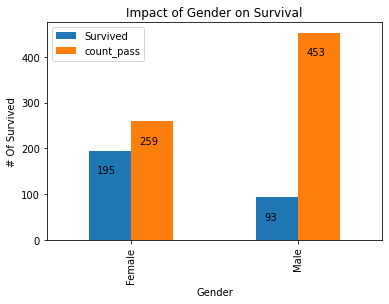

In [4]:
#Let's see if Gender has any impact on Survival Rate. A simple Bar Graph can explain this more
import matplotlib.pyplot as plt
gender_df.plot.bar()
plt.title('Impact of Gender on Survival')
plt.xlabel('Gender')
plt.ylabel('# Of Survived')
plt.xticks(range(len(gender_df)),['Female','Male'])

def create_value_labels(list_data,decimals,x_adjust,y_adjust):
  for x,y in enumerate(list_data):
    plt.text(x+x_adjust,y+y_adjust,round(list_data[x],decimals))

create_value_labels(list(gender_df['Survived']),0,-0.2,-50)
create_value_labels(list(gender_df['count_pass']),0,0.05,-50)

plt.show
#in the below bar graph we can see that Female Passengers had a much higher chance of survival than Male Passengers. Lets get this in Percentage basis.


In [5]:
#Group by survived column to see the effect of each parameter in the dataframe
#looks like passengers with parents and children were preferred and the higher Fare meant higher changes of survival but the 
#Passenger Class was only at 1.9 compared to 2.5 for passengers that haven't survived but as this is a mean it probably doesn't explain much

survive_data = titatinc_age_emabark.groupby('Survived',as_index=False)
survive_mean_data=survive_data.mean()
survive_mean_data.head()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,count_pass
0,0,442.299528,2.485849,30.626179,0.525943,0.365566,22.965456,1.0
1,1,457.850694,1.878472,28.193299,0.496528,0.531250,51.647672,1.0


In [6]:
#Let's see if Age has played a role in the survival rate. Were Children preferred over adults?
titatinc_age_emabark.loc[titatinc_age_emabark['Age']>=18,'adult']=1
titatinc_age_emabark.loc[titatinc_age_emabark['Age']<18,'adult']=0

titatinc_age_emabark.head(100)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count_pass,adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,1,1.0
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S,1,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,1,1.0
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,1,0.0


In [7]:
#It certainly looks like children (54%) were preferred over Adults (38%) Let's look at the numbers and percentages in graphs
age_df =titatinc_age_emabark.groupby('adult',as_index=False).agg({'Survived':sum,'count_pass':sum})
age_df['survival_rate']=age_df['Survived']/age_df['count_pass']
age_df.head()

,adult,Survived,count_pass,survival_rate
0,0.0,61,113,0.539823
1,1.0,227,599,0.378965


<function matplotlib.pyplot.show>

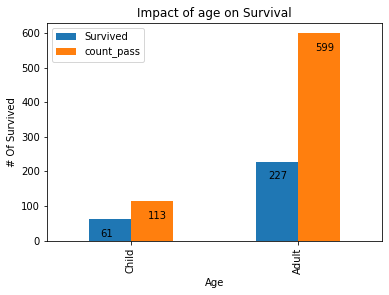

In [8]:
age_df.plot.bar(x='adult',y=['Survived','count_pass'])
plt.title('Impact of age on Survival')
plt.xlabel('Age')
plt.ylabel('# Of Survived')
plt.xticks(range(len(age_df)),['Child','Adult'])

def create_value_labels(list_data,decimals,x_adjust,y_adjust):
  for x,y in enumerate(list_data):
    plt.text(x+x_adjust,y+y_adjust,round(list_data[x],decimals))

create_value_labels(list(age_df['Survived']),0,-0.18,-50)
create_value_labels(list(age_df['count_pass']),0,0.10,-50)

plt.show

0    0.539823
1    0.378965
Name: survival_rate, dtype: float64


<function matplotlib.pyplot.show>

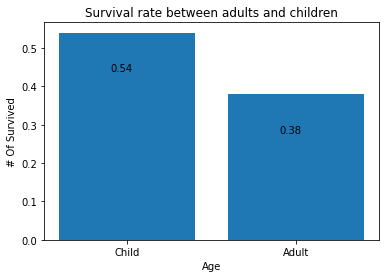

In [9]:
age_df_list =list(age_df['survival_rate'])
print(age_df['survival_rate'])
plt.bar(range(len(age_df_list)),age_df_list)
plt.title('Survival rate between adults and children')
plt.xlabel('Age')
plt.ylabel('# Of Survived')
plt.xticks(range(len(age_df)),['Child','Adult'])

def create_value_labels(list_data,decimals,x_adjust,y_adjust):
  for x,y in enumerate(list_data):
    plt.text(x+x_adjust,y+y_adjust,round(list_data[x],decimals))

create_value_labels(list(age_df['survival_rate']),2,-0.10,-0.10)


plt.show

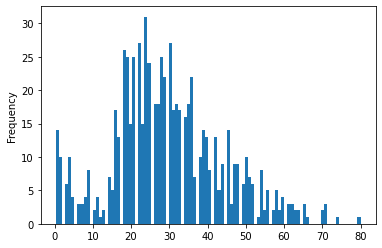

In [10]:
#Let's see if there are any age enries in the dataframe which have a very small sample. These records must be removed as they skew the results
titatinc_age_emabark['Age'].plot.hist(bins=100)

In [11]:
age_drop_df=titatinc_age_emabark.groupby('Age')['count_pass'].sum().reset_index()



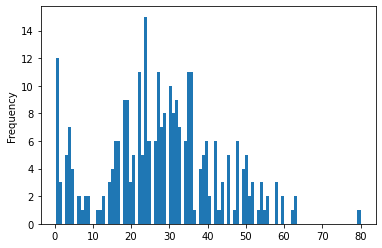

In [12]:
survived_data=titatinc_age_emabark.loc[titatinc_age_emabark['Survived']==1]
survived_data['Age'].plot.hist(bins=100)

In [13]:
v = titatinc_age_emabark[['Age','count_pass']]
titanic_age_gt5=titatinc_age_emabark[v.replace(v.stack().value_counts()).gt(5).all(1)]

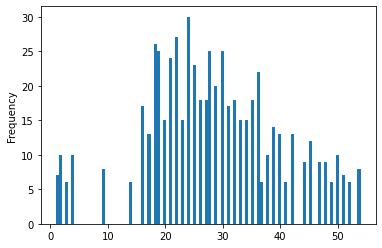

In [15]:
titanic_age_gt5['Age'].plot.hist(bins=100)

In [20]:
titanic_age_gt5_survived = titanic_age_gt5.groupby('Age',as_index=False).agg({'count_pass':sum,'Survived':sum})
titanic_age_gt5_survived['rate']=titanic_age_gt5_survived['Survived']/titanic_age_gt5_survived['count_pass']
titanic_age_gt5_survived.head(50)

,Age,count_pass,Survived,rate
0,1.0,7,5,0.714286
1,2.0,10,3,0.300000
2,3.0,6,5,0.833333
3,4.0,10,7,0.700000
4,9.0,8,2,0.250000
5,14.0,6,3,0.500000
6,16.0,17,6,0.352941
7,17.0,13,6,0.461538
8,18.0,26,9,0.346154
9,19.0,25,9,0.360000


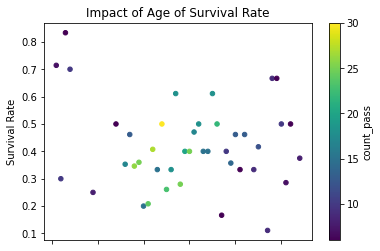

In [41]:
titanic_age_gt5_survived.plot.scatter('Age','rate',s=20,c='count_pass',colormap='viridis')
plt.title('Impact of Age of Survival Rate')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
#plt.xticks(ticks=titanic_age_gt5_survived['Age'])

plt.show()

In [44]:
titanic_pclass = titatinc_age_emabark.groupby('Pclass',as_index=False).agg({'count_pass':sum,'Survived':sum})
titanic_pclass['rate']=titanic_pclass['Survived']/titanic_pclass['count_pass']
titanic_pclass.head()
#Passenger Class seems to be a huge parameter for Survival. Almost 65% of the 1st class passengers survived where as only 23% of 3rd class passengers survived.
#now lets add in Age to the analysis

,Pclass,count_pass,Survived,rate
0,1,184,120,0.652174
1,2,173,83,0.479769
2,3,355,85,0.239437


In [46]:
titanic_pclass_age =titatinc_age_emabark.groupby(['Pclass','adult'],as_index=False).agg({'count_pass':sum,'Survived':sum})
titanic_pclass_age['rate']=titanic_pclass_age['Survived']/titanic_pclass_age['count_pass']
titanic_pclass_age.head(10)

,Pclass,adult,count_pass,Survived,rate
0,1,0.0,12,11,0.916667
1,1,1.0,172,109,0.633721
2,2,0.0,23,21,0.913043
3,2,1.0,150,62,0.413333
4,3,0.0,78,29,0.371795
5,3,1.0,277,56,0.202166


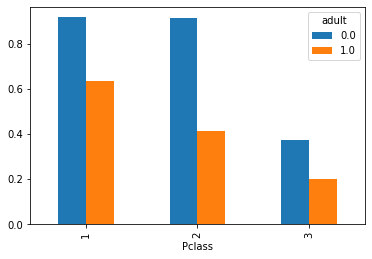

In [65]:
titanic_pclass_age_pivot=titanic_pclass_age.pivot_table(values='rate',columns='adult',index='Pclass')
titanic_pclass_age_pivot.head()

titanic_pclass_age_pivot.plot.bar()

#Chances of survival seem to be over 90% if you are a child in Passenger Class 1 and 2. This explains that Children with higher SES were preferred over everyone else in comparison